In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from tabulate import tabulate
import json
import numpy as np

# 1. Prepare data

In [40]:
jobs = pd.read_csv("../data/clean data.csv")
jobs = jobs.drop(columns = ['Sex', 'Contract Type'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,20500000.0,Nhân viên,2 năm,java,tiếng anh,Hà Nội
1,36500000.0,Nhân viên,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,22500000.0,Trưởng/Phó phòng,2 năm,Khác,Không yêu cầu,Hà Nội
3,22500000.0,Trưởng nhóm,3 năm,Khác,Không yêu cầu,Hà Nội
4,30000000.0,Nhân viên,3 năm,php,Không yêu cầu,Hà Nội


In [41]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                2262 non-null   float64
 1   Level                 2262 non-null   object 
 2   Year of Experience    2262 non-null   object 
 3   Programming Language  2262 non-null   object 
 4   Language              2262 non-null   object 
 5   Location              2262 non-null   object 
dtypes: float64(1), object(5)
memory usage: 106.2+ KB


# 2. Feture engineering

## 2.1 Encoding

- StandardScaler for 'Salary'

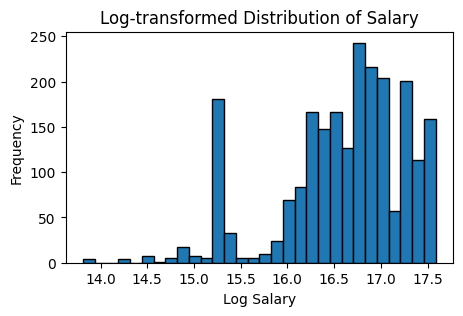

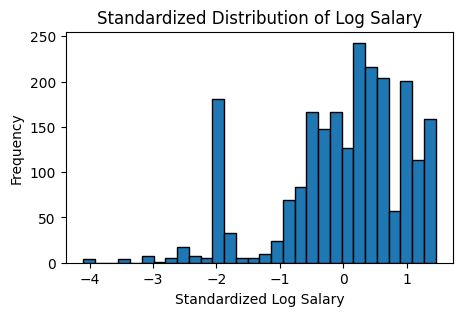

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có DataFrame jobs với dữ liệu ban đầu
# Áp dụng Log Transformation
jobs['Salary'] = np.log(jobs['Salary'])

# Kiểm tra phân phối sau khi biến đổi Log
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Log-transformed Distribution of Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

# Chuẩn hóa phân phối chuẩn cho biến Salary_log
scaler = StandardScaler()
jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# Kiểm tra phân phối sau khi chuẩn hóa
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Standardized Distribution of Log Salary')
plt.xlabel('Standardized Log Salary')
plt.ylabel('Frequency')
plt.show()


In [43]:
# # Tạo các biểu đồ trên cùng một hàng
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Kiểm tra phân phối ban đầu của biến Salary
# axes[0].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[0].set_title('Initial Distribution of Salary')
# axes[0].set_xlabel('Salary')
# axes[0].set_ylabel('Frequency')

# # Chuẩn hóa phân phối chuẩn cho biến Salary
# scaler = StandardScaler()
# jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# # Kiểm tra phân phối sau khi chuẩn hóa
# axes[1].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[1].set_title('Standardized Distribution of Salary')
# axes[1].set_xlabel('Standardized Salary')
# axes[1].set_ylabel('Frequency')

# # Hiển thị các biểu đồ
# plt.tight_layout()
# plt.show()

In [44]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.350589,Nhân viên,2 năm,java,tiếng anh,Hà Nội
1,1.200929,Nhân viên,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,0.487806,Trưởng/Phó phòng,2 năm,Khác,Không yêu cầu,Hà Nội
3,0.487806,Trưởng nhóm,3 năm,Khác,Không yêu cầu,Hà Nội
4,0.911853,Nhân viên,3 năm,php,Không yêu cầu,Hà Nội


- Encoding for 'Level'

In [45]:
encoder = OrdinalEncoder(categories=[['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc']])
encoded_level = encoder.fit_transform(jobs[['Level']])
jobs['Level'] = encoded_level
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.350589,1.0,2 năm,java,tiếng anh,Hà Nội
1,1.200929,1.0,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,0.487806,3.0,2 năm,Khác,Không yêu cầu,Hà Nội
3,0.487806,2.0,3 năm,Khác,Không yêu cầu,Hà Nội
4,0.911853,1.0,3 năm,php,Không yêu cầu,Hà Nội


- Encoding for 'Year of Experience'

In [46]:
encoder = OrdinalEncoder(categories=[['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm']])
encoded_YoE = encoder.fit_transform(jobs[['Year of Experience']])
jobs['Year of Experience'] = encoded_YoE
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.350589,1.0,3.0,java,tiếng anh,Hà Nội
1,1.200929,1.0,3.0,Khác,tiếng anh,Hồ Chí Minh
2,0.487806,3.0,3.0,Khác,Không yêu cầu,Hà Nội
3,0.487806,2.0,4.0,Khác,Không yêu cầu,Hà Nội
4,0.911853,1.0,4.0,php,Không yêu cầu,Hà Nội


- Encoding for 'Programming Language'

In [47]:
encoder = TargetEncoder()
encoded_pl = encoder.fit_transform(jobs['Programming Language'], jobs['Salary'])
jobs['Programming Language'] = encoded_pl

- Encoding for 'Language'

In [48]:
encoder = TargetEncoder()
encoded_language = encoder.fit_transform(jobs['Language'], jobs['Salary'])
jobs['Language'] = encoded_language
from category_encoders import OneHotEncoder

# one_hot_encoder = OneHotEncoder()
# job_pl = one_hot_encoder.fit_transform(jobs['Language'])

# jobs = pd.concat([jobs, job_pl], axis=1)
# jobs = jobs.drop(columns = ['Language'])
# jobs.head()

- Encoding for 'Location'

In [49]:
# encoder = TargetEncoder()
# encoded_location = encoder.fit_transform(jobs['Location'], jobs['Salary'])
# jobs['Location'] = encoded_location

one_hot_encoder = OneHotEncoder()
job_pl = one_hot_encoder.fit_transform(jobs['Location'])

jobs = pd.concat([jobs, job_pl], axis=1)
jobs = jobs.drop(columns = ['Location'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location_1,Location_2,Location_3,Location_4
0,0.350589,1.0,3.0,0.574986,-0.174231,1,0,0,0
1,1.200929,1.0,3.0,-0.314809,-0.174231,0,1,0,0
2,0.487806,3.0,3.0,-0.314809,0.090835,1,0,0,0
3,0.487806,2.0,4.0,-0.314809,0.090835,1,0,0,0
4,0.911853,1.0,4.0,0.098723,0.090835,1,0,0,0


In [50]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location_1,Location_2,Location_3,Location_4
0,0.350589,1.0,3.0,0.574986,-0.174231,1,0,0,0
1,1.200929,1.0,3.0,-0.314809,-0.174231,0,1,0,0
2,0.487806,3.0,3.0,-0.314809,0.090835,1,0,0,0
3,0.487806,2.0,4.0,-0.314809,0.090835,1,0,0,0
4,0.911853,1.0,4.0,0.098723,0.090835,1,0,0,0


## 2.2 Correlation with target variable

In [51]:
# Tính toán ma trận tương quan
correlation_matrix = jobs.corr()

# Hiển thị tương quan của từng đặc trưng với biến mục tiêu
target_correlation = correlation_matrix['Salary']
print(target_correlation)

Salary                  1.000000
Level                   0.417324
Year of Experience      0.682410
Programming Language    0.412796
Language                0.131428
Location_1              0.023857
Location_2              0.016754
Location_3             -0.009880
Location_4             -0.072803
Name: Salary, dtype: float64


# 3. Training

In [52]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'XGB': xgb.XGBRegressor()
}

In [53]:
X = jobs.drop(columns = ['Salary'])
y = jobs['Salary']

In [54]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # Đánh giá mô hình sử dụng cross-validation và r2 làm thước đo
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    # Tính R² trung bình
    mean_r2 = np.mean(scores)
    results.append((name, mean_r2))

# Sắp xếp kết quả theo R² Score từ cao xuống thấp
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lấy tên của mô hình có điểm số R² cao nhất
model_best = results_df['Model'].iloc[0]
print("Best performing model:", model_best)

                       Model  R2 Score
4      RandomForestRegressor  0.709039
7                        XGB  0.700984
3  GradientBoostingRegressor  0.697802
5      DecisionTreeRegressor  0.693168
6                        SVR  0.670763
1                      Ridge  0.574535
0           LinearRegression  0.574293
2                      Lasso  0.071128
Best performing model: RandomForestRegressor


In [55]:

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
# Định nghĩa mô hình
model = models[model_best]

# Lặp qua số lượng đặc trưng từ 2 đến số lượng đặc trưng tối đa
for i in range(2, len(X.columns) + 1):
    # Thiết lập RFE với số đặc trưng hiện tại
    selector = RFE(model, n_features_to_select=i, step=1)
    selector.fit(X, y)  # Lưu ý là sử dụng toàn bộ dữ liệu X, y
    
    # Đặc trưng được chọn
    selected_features = X.columns[selector.support_]
    
    # Tạo tập dữ liệu chỉ với các đặc trưng được chọn
    X_selected = selector.transform(X)
    
    # Đánh giá mô hình sử dụng cross-validation
    scores = cross_val_score(model, X_selected, y, cv=kf, scoring='r2')
    
    # Tính R² Score trung bình
    mean_r2 = np.mean(scores)
    
    # Lưu kết quả
    results.append((i, selected_features.tolist(), mean_r2))

# Chuyển kết quả vào DataFrame và sắp xếp theo R²
results_df = pd.DataFrame(results, columns=['Num Features', 'Features', 'R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lưu các đặc trưng quan trọng nhất từ mô hình tốt nhất
variable_important = results_df.iloc[0, 1]
print("Most important features:", variable_important)


   Num Features                                           Features  R2 Score
6             8  [Level, Year of Experience, Programming Langua...  0.710318
5             7  [Level, Year of Experience, Programming Langua...  0.709485
4             6  [Level, Year of Experience, Programming Langua...  0.707348
3             5  [Level, Year of Experience, Programming Langua...  0.707081
2             4  [Level, Year of Experience, Programming Langua...  0.692822
1             3  [Level, Year of Experience, Programming Language]  0.677886
0             2                        [Level, Year of Experience]  0.574119
Most important features: ['Level', 'Year of Experience', 'Programming Language', 'Language', 'Location_1', 'Location_2', 'Location_3', 'Location_4']


In [56]:
# Danh sách các mô hình và tham số tương ứng
models = {
    'RandomForestRegressor': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'XGBRegressor': (xgb.XGBRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }),
}

In [58]:

# Phân chia tập dữ liệu
X = jobs[variable_important]
y = jobs['Salary']

# Kết quả lưu tham số tốt nhất
best_params = {}

KFold = KFold(n_splits=5, shuffle=True, random_state=42)

# Đào tạo và điều chỉnh mô hình cho từng loại
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Thiết lập Grid Search với kiểm định chéo
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=KFold, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X, y)
    
    # Lưu tham số tốt nhất
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Ghi kết quả vào file JSON
with open('best_params_new.json', 'w') as fp:
    json.dump(best_params, fp)

print("All best parameters have been saved to 'best_params_new.json'.")


Training RandomForestRegressor...
Fitting 5 folds for each of 162 candidates, totalling 810 fits


d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\d6thSemesterUniversity\Data Science\Python Jupyter\.venv\lib\site-p

Best parameters for RandomForestRegressor: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training XGBRegressor...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBRegressor: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
All best parameters have been saved to 'best_params.json'.


In [59]:
from sklearn.model_selection import cross_val_score, KFold

# Đọc file JSON
with open('best_params_new.json', 'r') as fp:
    best_params = json.load(fp)

# Tạo dictionary của các mô hình đã cấu hình với random_state
models_configured = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42, **best_params['RandomForestRegressor']),
    'XGBRegressor': xgb.XGBRegressor(random_state=42, **best_params['XGBRegressor'])
}

# Khởi tạo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mỗi mô hình sử dụng cross-validation và lưu kết quả
results = {}
for name, model in models_configured.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results[name] = np.mean(scores)

# Sắp xếp kết quả theo R2 Score giảm dần và in ra
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for model_name, score in sorted_results:
    print(f"{model_name}: R2 Score = {score}")

RandomForestRegressor: R2 Score = 0.7202710698381134
XGBRegressor: R2 Score = 0.7146838385184393
